In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ลองใช้ฟอนต์ที่มักมีอยู่แล้วในระบบ
rcParams['font.family'] = 'Tahoma'  # หรือ 'Noto Sans Thai' ถ้าติดตั้งไว้

In [6]:
# โหลดข้อมูล RFM
rfm = pd.read_csv('../data/rfm_customers.csv')

# แปลงค่า RFM_Score ให้เป็น string เผื่อไว้สำหรับ group
rfm['RFM_Score'] = rfm['RFM_Score'].astype(str)


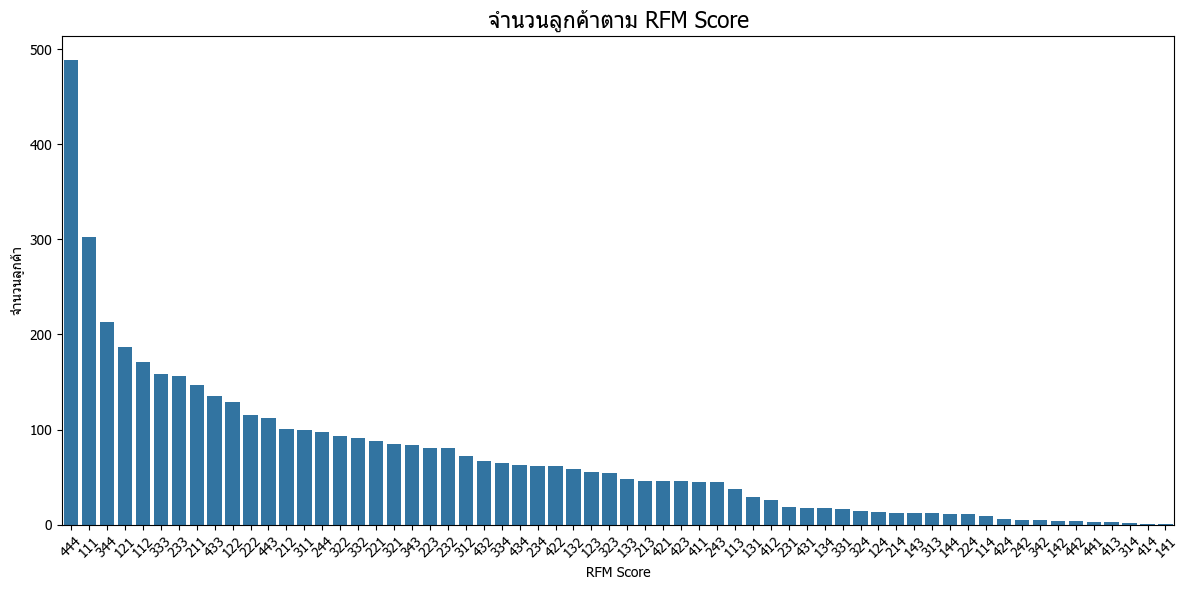

In [7]:
# 🔹1. กราฟแสดงจำนวนลูกค้าต่อ RFM_Score
plt.figure(figsize=(12, 6))
sns.countplot(data=rfm, x='RFM_Score', order=rfm['RFM_Score'].value_counts().index)
plt.title('จำนวนลูกค้าตาม RFM Score', fontsize=16)
plt.xlabel('RFM Score')
plt.ylabel('จำนวนลูกค้า')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

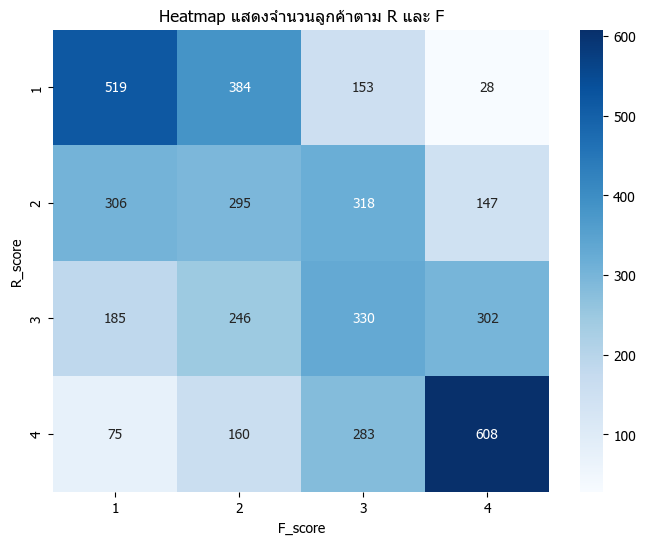

In [9]:
# 🔹2. Heatmap เปรียบเทียบ R กับ F
rfm['R_score'] = rfm['R_score'].astype(int)
rfm['F_score'] = rfm['F_score'].astype(int)
rfm_heat = rfm.groupby(['R_score', 'F_score']).size().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(rfm_heat, annot=True, fmt='g', cmap='Blues')
plt.title('Heatmap แสดงจำนวนลูกค้าตาม R และ F')
plt.xlabel('F_score')
plt.ylabel('R_score')
plt.show()


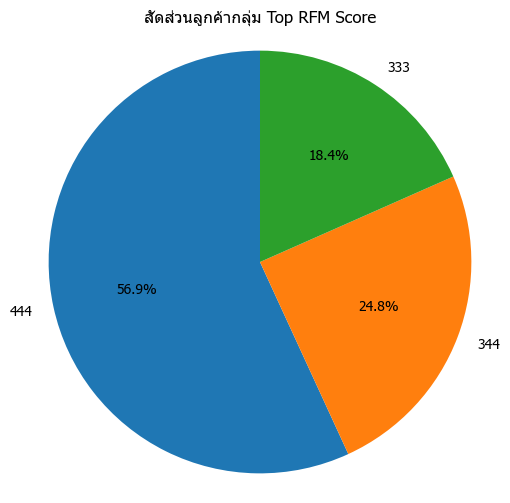

In [10]:
# 🔹3. Pie chart ของกลุ่ม RFM ที่ดีที่สุด (เช่น 444, 344, 333)
top_scores = ['444', '344', '333']
top_group = rfm[rfm['RFM_Score'].isin(top_scores)]
label_counts = top_group['RFM_Score'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('สัดส่วนลูกค้ากลุ่ม Top RFM Score')
plt.axis('equal')
plt.show()